In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [15]:
analysis = scripts.Analysis()

In [16]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_5',
                          'wgt_1_.8_.6_.5_.4',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [17]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_5',
                               'wgt_1_.8_.6_.5_.4',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [18]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [19]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [20]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [21]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [22]:
fig.display_hrefanchor()

In [23]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [24]:
table_dgdgs.display_hrefanchor()

In [25]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

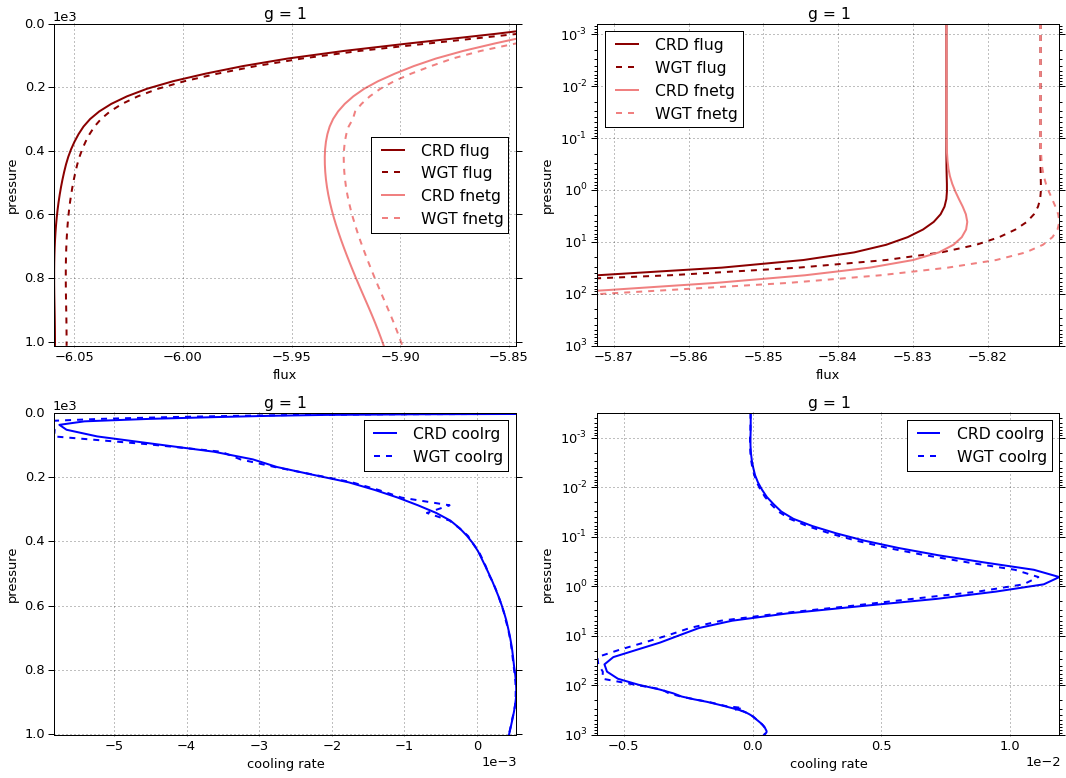

# Figure: flux, cooling rate. g-group 2

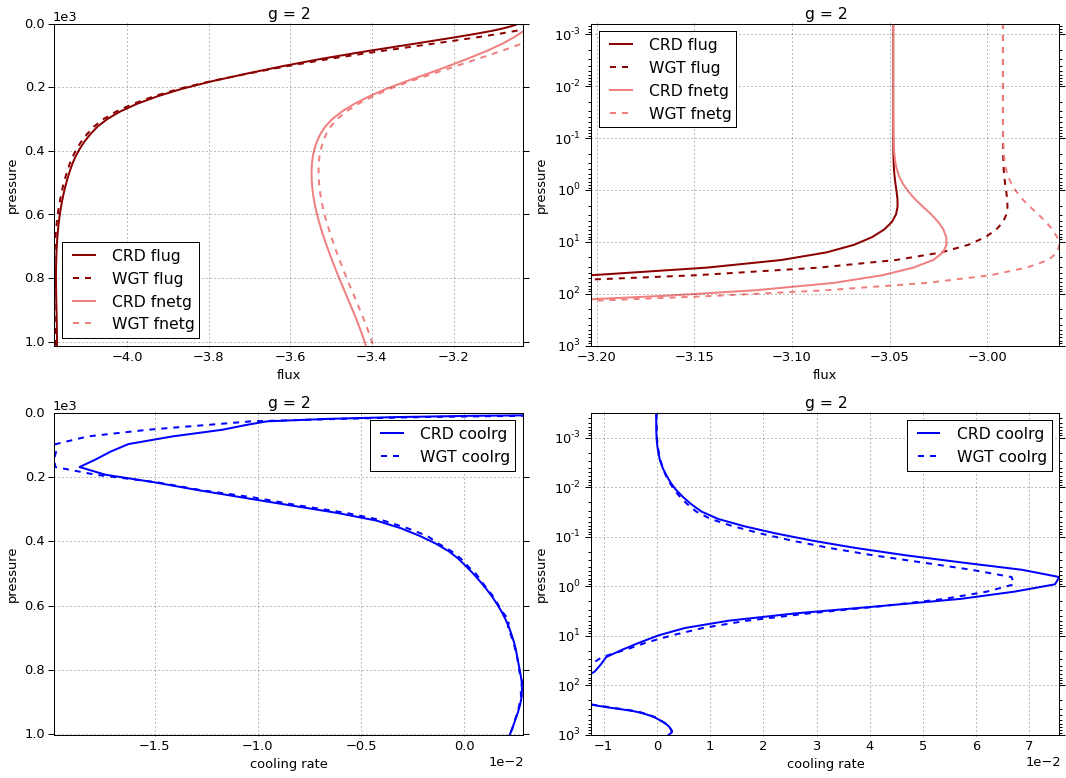

# Figure: flux, cooling rate. g-group 3

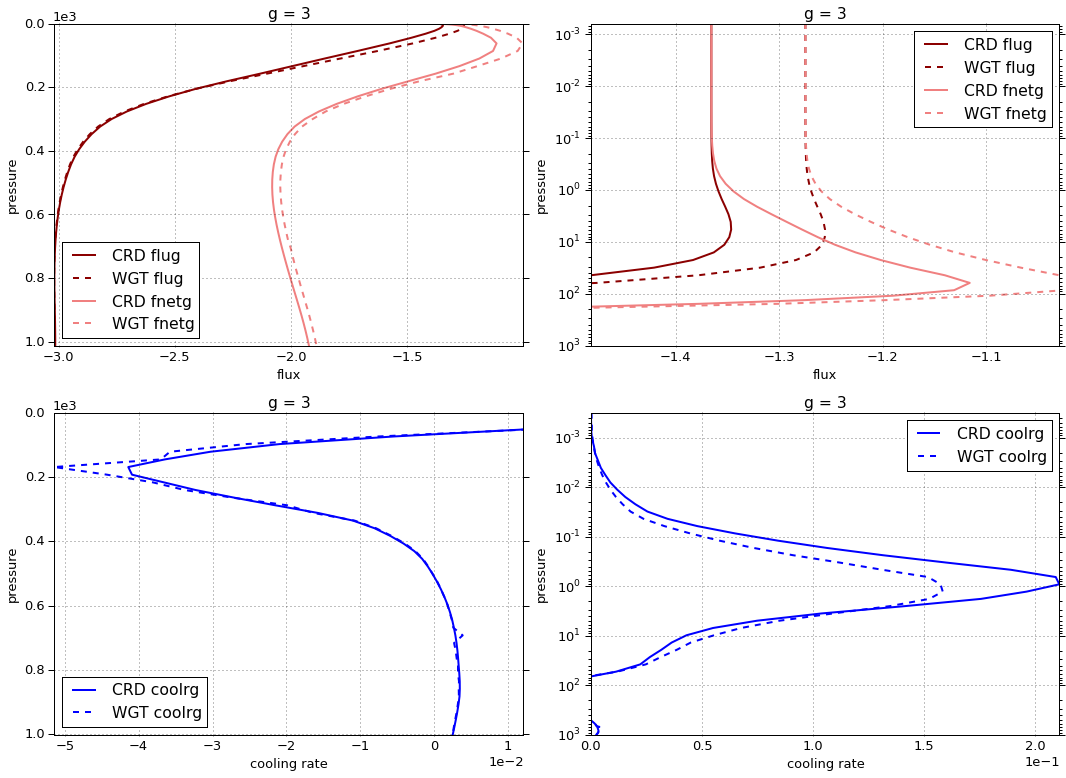

# Figure: flux, cooling rate. g-group 4

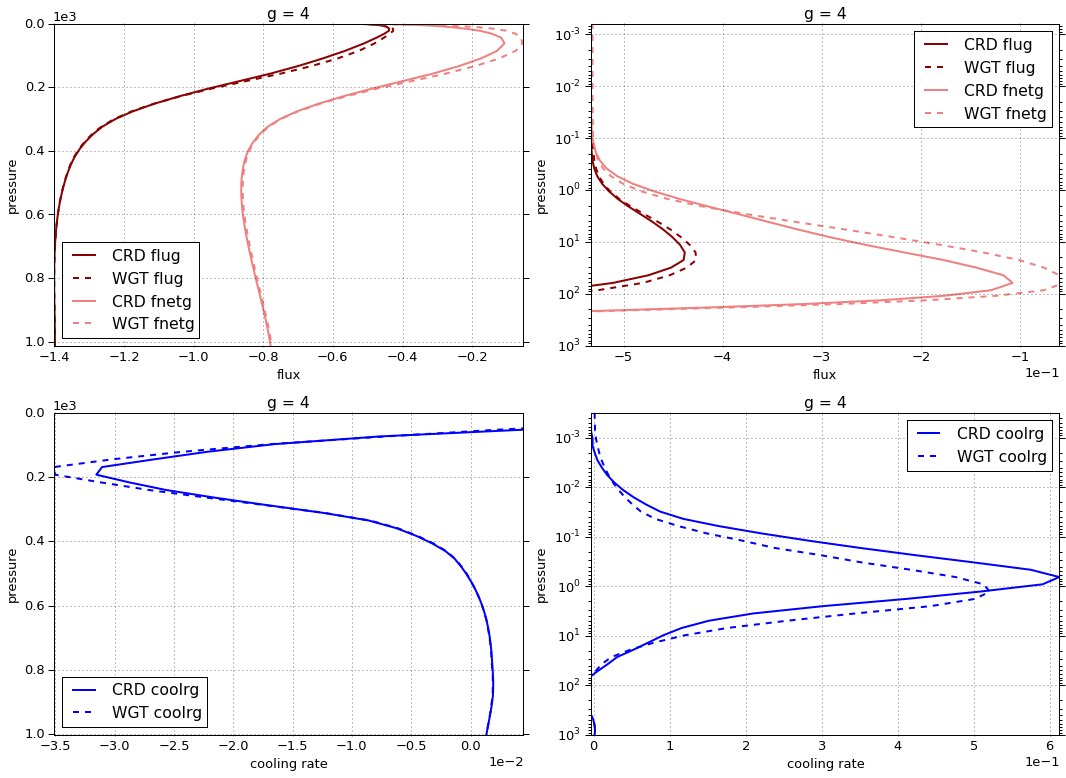

# Figure: flux, cooling rate. g-group 5

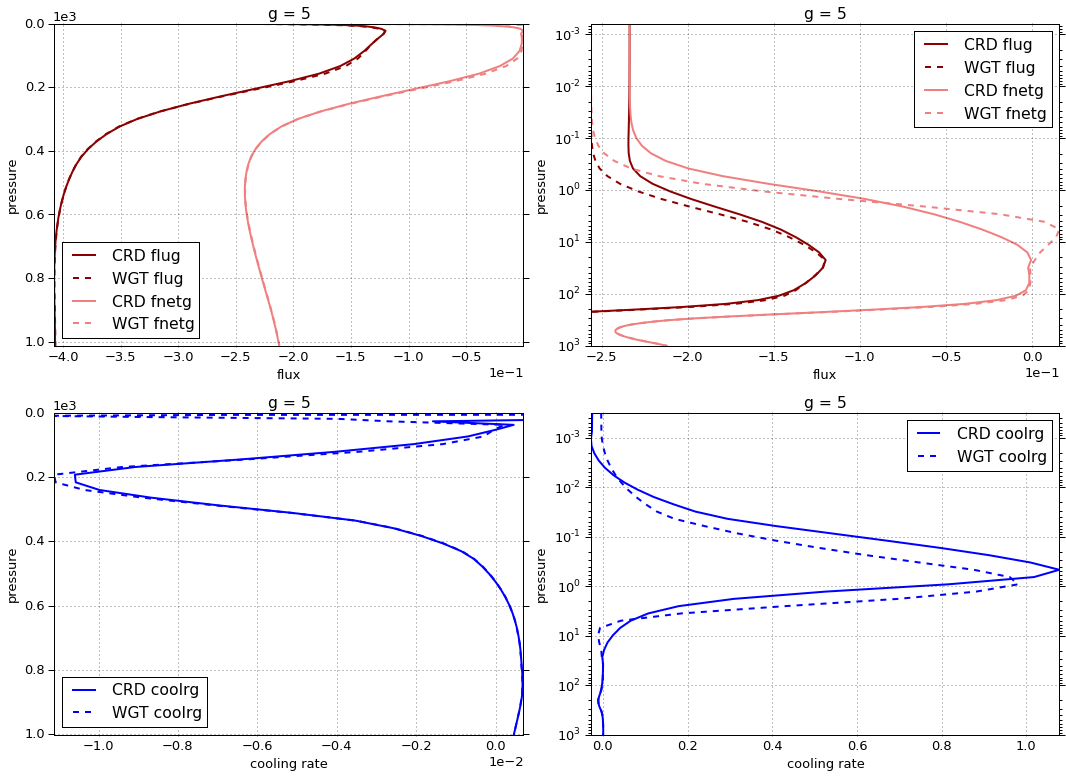

# Figure: flux, cooling rate. g-group total

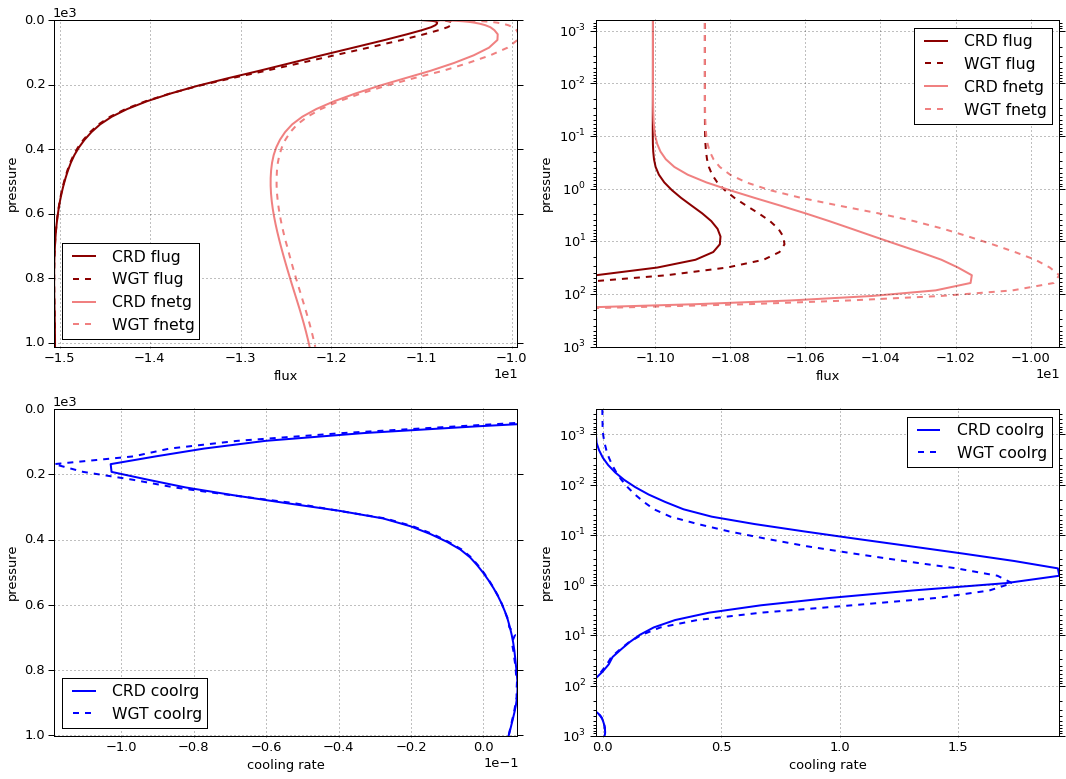

In [26]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [27]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.825525  0.000000 -5.825525
  1013     76    -6.058956  0.151355 -5.907601
2 0        1     -3.048265  0.000000 -3.048265
  1013     76    -4.171901  0.757208 -3.414693
3 0        1     -1.365669  0.000000 -1.365669
  1013     76    -3.015330  1.092173 -1.923157
4 0        1     -0.533028  0.000000 -0.533028
  1013     76    -1.398187  0.619420 -0.778767
5 0        1     -0.233878  0.000000 -0.233878
  1013     76    -0.407029  0.194697 -0.212332


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -5.812945  0.000000 -5.812945
  1013     76    -6.053616  0.154581 -5.899036
2 0        1     -2.992092  0.000000 -2.992092
  1013     76    -4.176529  0.779922 -3.396607
3 0        1     -1.274755  0.000000 -1.274755
  1013     76    -3.016475  1.125887 -1.890588
4 0        1     -0.531814  0.000000 -0.531814
  1013     76    -1.397976  0.622387 -0.775589
5 0        1     -0.256321  0.000000 -0.256321
  1013     76    -0.406807  0.194654 -0.212153


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.012580  0.000000  0.012580
  1013     76     0.005340  0.003226  0.008565
2 0        1      0.056172  0.000000  0.056172
  1013     76    -0.004628  0.022714  0.018086
3 0        1      0.090915  0.000000  0.090915
  1013     76    -0.001146  0.033714  0.032568
4 0        1      0.001215  0.000000  0.001215
  1013     76     0.000211  0.002967  0.003178
5 0        1     -0.022443  0.000000 -0.022443
  1013     76     0.000222 -0.000042  0.000180

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000075
  1001.112500 75     0.000440
2 0.000312    1     -0.000150
  1001.112500 75     0.002206
3 0.000312    1      0.000094
  1001.112500 75     0.002538
4 0.000312    1     -0.003405
  1001.112500 75     0.001321
5 0.000312    1     -0.025350
  1001.112500 75     0.000454


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000084
  1001.112500 75     0.000438
2 0.000312    1     -0.000075
  1001.112500 75     0.002216
3 0.000312    1      0.000371
  1001.112500 75     0.002515
4 0.000312    1      0.001395
  1001.112500 75     0.001314
5 0.000312    1     -0.004106
  1001.112500 75     0.000453


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -8.352330e-06
  1001.112500 75    -1.687930e-06
2 0.000312    1      7.417910e-05
  1001.112500 75     9.550500e-06
3 0.000312    1      2.770676e-04
  1001.112500 75    -2.302560e-05
4 0.000312    1      4.800278e-03
  1001.112500 75    -7.370300e-06
5 0.000312    1      2.124384e-02
  1001.112500 75    -9.160600e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-11.006366,0.000000,-11.006366
1013,76,-15.051403,2.814853,-12.236550



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-10.867926,0.000000,-10.867926
1013,76,-15.051403,2.877431,-12.173973



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.384396e-01,0.000000,0.138440
1013,76,5.000000e-08,0.062578,0.062578


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.028886
1001.112500,75,0.006959



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.002499
1001.112500,75,0.006936



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.026387
1001.112500,75,-0.000023


In [28]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.092708,0.092880
5,0.027167,0.027028


In [29]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      1     1 -5.825525  0.000000e+00 -5.825525   1     1 -5.812945   
0.000624      1     2 -5.825525  5.330008e-09 -5.825525   1     2 -5.812945   
0.000876      1     3 -5.825525  8.008066e-09 -5.825525   1     3 -5.812945   
0.001229      1     4 -5.825525  1.333258e-08 -5.825525   1     4 -5.812945   
0.001723      1     5 -5.825526  2.363848e-08 -5.825525   1     5 -5.812945   
0.002417      1     6 -5.825526  4.297243e-08 -5.825525   1     6 -5.812945   
0.003391      1     7 -5.825526  7.844630e-08 -5.825525   1     7 -5.812945   
0.004757      1     8 -5.825526  1.424283e-07 -5.825525   1     8 -5.812945   
0.006672      1     9 -5.825526  2.562766e-07 -5.825525   1     9 -5.812946   
0.009359      1    10 -5.825526  4.567253e-07 -5.825525   1    10 -5.812946   
0.013128      1    11 -5.825526  8.064407e-07 -5.825525   1    11 -5.812946   
0.018415      1    12 -5.825526  1.412660e-06 -5.825525   1    12 -5.812946   
0.025830      1    13 -5.825527  2.456440e-06 -5.825524   1    13 -5.812946   
0.036232      1    14 -5.825527  4.239311e-06 -5.825523   1    14 -5.812947   
0.050823      1    15 -5.825528  7.491762e-06 -5.825520   1    15 -5.812947   
0.071291      1    16 -5.825528  1.376081e-05 -5.825514   1    16 -5.812948   
0.100000      1    17 -5.825529  2.546695e-05 -5.825503   1    17 -5.812949   
0.140271      1    18 -5.825529  4.651085e-05 -5.825483   1    18 -5.812950   
0.196760      1    19 -5.825528  8.340080e-05 -5.825445   1    19 -5.812950   
0.275997      1    20 -5.825524  1.468859e-04 -5.825377   1    20 -5.812947   
0.387100      1    21 -5.825513  2.544833e-04 -5.825259   1    21 -5.812939   
0.543100      1    22 -5.825490  4.332270e-04 -5.825057   1    22 -5.812919   
0.761700      1    23 -5.825463  7.137887e-04 -5.824749   1    23 -5.812898   
1.068500      1    24 -5.825459  1.120333e-03 -5.824338   1    24 -5.812903   
1.498800      1    25 -5.825535  1.678465e-03 -5.823857   1    25 -5.812991   
2.102400      1    26 -5.825782  2.435953e-03 -5.823346   1    26 -5.813279   
2.949000      1    27 -5.826307  3.380982e-03 -5.822926   1    27 -5.813827   
4.136600      1    28 -5.827222  4.485433e-03 -5.822737   1    28 -5.814774   
5.802500      1    29 -5.828655  5.760705e-03 -5.822894   1    29 -5.816295   
8.139200      1    30 -5.830704  7.233617e-03 -5.823471   1    30 -5.818460   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    1    47 -6.045836  1.133254e-01 -5.932510   1    47 -6.040798   
347.300000    1    48 -6.048114  1.145690e-01 -5.933545   1    48 -6.043045   
371.075000    1    49 -6.049981  1.157613e-01 -5.934220   1    49 -6.044881   
394.850000    1    50 -6.051551  1.169421e-01 -5.934609   1    50 -6.046421   
418.625000    1    51 -6.052847  1.180861e-01 -5.934761   1    51 -6.047689   
442.400000    1    52 -6.053887  1.191645e-01 -5.934723   1    52 -6.048704   
466.175000    1    53 -6.054748  1.202092e-01 -5.934539   1    53 -6.049543   
489.950000    1    54 -6.055512  1.213006e-01 -5.934211   1    54 -6.050287   
513.725000    1    55 -6.056193  1.224479e-01 -5.933745   1    55 -6.050948   
537.500000    1    56 -6.056793  1.236493e-01 -5.933144   1    56 -6.051531   
561.275000    1    57 -6.057318  1.248989e-01 -5.932419   1    57 -6.052039   
585.050000    1    58 -6.057771  1.261940e-01 -5.931577   1    58 -6.052477   
608.825000    1    59 -6.058154  1.275271e-01 -5.930627   1    59 -6.052848   
632.600000    1    60 -6.058475  1.288935e-01 -5.929581   1    60 -6.053157   
656.375000    1    61 -6.058737  1.302879e-01 -5.928449   1    61 -6.053409   
680.150000    1    62 -6.058945  1.316976e-01 -5.927247   1    62 -6.053610   
703.925000    1    63 -6.059105  1.331252e-01 -5.925979   1   

In [30]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -3.048265  0.000000e+00 -3.048265   2     1 -2.992092   
0.000624      2     2 -3.048265  3.022948e-08 -3.048265   2     2 -2.992092   
0.000876      2     3 -3.048265  4.542740e-08 -3.048265   2     3 -2.992092   
0.001229      2     4 -3.048265  7.565609e-08 -3.048265   2     4 -2.992092   
0.001723      2     5 -3.048265  1.341659e-07 -3.048265   2     5 -2.992093   
0.002417      2     6 -3.048265  2.438684e-07 -3.048265   2     6 -2.992093   
0.003391      2     7 -3.048265  4.449164e-07 -3.048265   2     7 -2.992093   
0.004757      2     8 -3.048265  8.068942e-07 -3.048265   2     8 -2.992093   
0.006672      2     9 -3.048266  1.449462e-06 -3.048264   2     9 -2.992093   
0.009359      2    10 -3.048266  2.577433e-06 -3.048263   2    10 -2.992093   
0.013128      2    11 -3.048266  4.538284e-06 -3.048262   2    11 -2.992093   
0.018415      2    12 -3.048267  7.923060e-06 -3.048259   2    12 -2.992093   
0.025830      2    13 -3.048267  1.372287e-05 -3.048253   2    13 -2.992093   
0.036232      2    14 -3.048266  2.357592e-05 -3.048243   2    14 -2.992092   
0.050823      2    15 -3.048264  4.145562e-05 -3.048223   2    15 -2.992090   
0.071291      2    16 -3.048259  7.576621e-05 -3.048183   2    16 -2.992084   
0.100000      2    17 -3.048247  1.395685e-04 -3.048107   2    17 -2.992071   
0.140271      2    18 -3.048222  2.537482e-04 -3.047968   2    18 -2.992044   
0.196760      2    19 -3.048171  4.529138e-04 -3.047718   2    19 -2.991993   
0.275997      2    20 -3.048074  7.937630e-04 -3.047280   2    20 -2.991897   
0.387100      2    21 -3.047893  1.367772e-03 -3.046526   2    21 -2.991722   
0.543100      2    22 -3.047573  2.314575e-03 -3.045258   2    22 -2.991429   
0.761700      2    23 -3.047098  3.798517e-03 -3.043299   2    23 -2.990970   
1.068500      2    24 -3.046540  5.959551e-03 -3.040580   2    24 -2.990412   
1.498800      2    25 -3.046086  8.933282e-03 -3.037153   2    25 -2.989902   
2.102400      2    26 -3.046024  1.295350e-02 -3.033071   2    26 -2.989744   
2.949000      2    27 -3.046804  1.792840e-02 -3.028875   2    27 -2.990267   
4.136600      2    28 -3.048923  2.369335e-02 -3.025230   2    28 -2.991999   
5.802500      2    29 -3.052892  3.031683e-02 -3.022575   2    29 -2.995473   
8.139200      2    30 -3.059093  3.797508e-02 -3.021118   2    30 -3.001101   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.072433  5.579482e-01 -3.514485   2    47 -4.081236   
347.300000    2    48 -4.090282  5.637942e-01 -3.526488   2    48 -4.098552   
371.075000    2    49 -4.104823  5.696884e-01 -3.535135   2    49 -4.112573   
394.850000    2    50 -4.116956  5.757457e-01 -3.541210   2    50 -4.124288   
418.625000    2    51 -4.126882  5.817649e-01 -3.545117   2    51 -4.133817   
442.400000    2    52 -4.134772  5.875315e-01 -3.547241   2    52 -4.141366   
466.175000    2    53 -4.141231  5.932008e-01 -3.548030   2    53 -4.147505   
489.950000    2    54 -4.146898  5.991492e-01 -3.547749   2    54 -4.152929   
513.725000    2    55 -4.151894  6.054400e-01 -3.546454   2    55 -4.157691   
537.500000    2    56 -4.156261  6.120168e-01 -3.544244   2    56 -4.161848   
561.275000    2    57 -4.160044  6.188672e-01 -3.541176   2    57 -4.165432   
585.050000    2    58 -4.163274  6.259409e-01 -3.537334   2    58 -4.168470   
608.825000    2    59 -4.165996  6.331923e-01 -3.532803   2    59 -4.171030   
632.600000    2    60 -4.168255  6.406066e-01 -3.527648   2    60 -4.173154   
656.375000    2    61 -4.170094  6.481248e-01 -3.521969   2    61 -4.174888   
680.150000    2    62 -4.171551  6.557086e-01 -3.515842   2    62 -4.176259   
703.925000    2    63 -4.172670  6.633215e-01 -3.509348   2   

In [31]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -1.365669  0.000000e+00 -1.365669   3     1 -1.274755   
0.000624      3     2 -1.365669  7.812110e-08 -1.365669   3     2 -1.274755   
0.000876      3     3 -1.365669  1.174624e-07 -1.365669   3     3 -1.274755   
0.001229      3     4 -1.365669  1.959819e-07 -1.365669   3     4 -1.274755   
0.001723      3     5 -1.365669  3.483520e-07 -1.365669   3     5 -1.274755   
0.002417      3     6 -1.365669  6.345706e-07 -1.365669   3     6 -1.274755   
0.003391      3     7 -1.365670  1.159735e-06 -1.365668   3     7 -1.274755   
0.004757      3     8 -1.365670  2.105752e-06 -1.365668   3     8 -1.274755   
0.006672      3     9 -1.365670  3.784835e-06 -1.365666   3     9 -1.274754   
0.009359      3    10 -1.365670  6.729972e-06 -1.365663   3    10 -1.274754   
0.013128      3    11 -1.365670  1.184246e-05 -1.365658   3    11 -1.274753   
0.018415      3    12 -1.365669  2.064942e-05 -1.365648   3    12 -1.274751   
0.025830      3    13 -1.365666  3.569997e-05 -1.365631   3    13 -1.274748   
0.036232      3    14 -1.365660  6.118563e-05 -1.365599   3    14 -1.274741   
0.050823      3    15 -1.365647  1.072739e-04 -1.365539   3    15 -1.274728   
0.071291      3    16 -1.365618  1.954313e-04 -1.365423   3    16 -1.274701   
0.100000      3    17 -1.365561  3.588038e-04 -1.365202   3    17 -1.274648   
0.140271      3    18 -1.365450  6.499372e-04 -1.364800   3    18 -1.274551   
0.196760      3    19 -1.365244  1.155001e-03 -1.364089   3    19 -1.274374   
0.275997      3    20 -1.364867  2.013065e-03 -1.362854   3    20 -1.274060   
0.387100      3    21 -1.364196  3.443571e-03 -1.360752   3    21 -1.273506   
0.543100      3    22 -1.363032  5.773609e-03 -1.357258   3    22 -1.272614   
0.761700      3    23 -1.361219  9.380297e-03 -1.351838   3    23 -1.271139   
1.068500      3    24 -1.358735  1.456208e-02 -1.344173   3    24 -1.269135   
1.498800      3    25 -1.355708  2.153585e-02 -1.334173   3    25 -1.266432   
2.102400      3    26 -1.352303  3.069053e-02 -1.321613   3    26 -1.263243   
2.949000      3    27 -1.349114  4.166652e-02 -1.307448   3    27 -1.259947   
4.136600      3    28 -1.346946  5.411662e-02 -1.292830   3    28 -1.257245   
5.802500      3    29 -1.346509  6.844657e-02 -1.278062   3    29 -1.255784   
8.139200      3    30 -1.348316  8.549074e-02 -1.262825   3    30 -1.255998   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -2.822070  8.370256e-01 -1.985045   3    47 -2.830832   
347.300000    3    48 -2.858807  8.428578e-01 -2.015949   3    48 -2.866549   
371.075000    3    49 -2.888315  8.496828e-01 -2.038633   3    49 -2.895088   
394.850000    3    50 -2.912546  8.572364e-01 -2.055309   3    50 -2.918468   
418.625000    3    51 -2.932051  8.651133e-01 -2.066937   3    51 -2.937202   
442.400000    3    52 -2.947304  8.728797e-01 -2.074424   3    52 -2.951801   
466.175000    3    53 -2.959579  8.806427e-01 -2.078936   3    53 -2.963527   
489.950000    3    54 -2.970176  8.888934e-01 -2.081283   3    54 -2.973628   
513.725000    3    55 -2.979378  8.975981e-01 -2.081780   3    55 -2.982424   
537.500000    3    56 -2.987306  9.066976e-01 -2.080608   3    56 -2.989964   
561.275000    3    57 -2.994085  9.161503e-01 -2.077934   3    57 -2.996418   
585.050000    3    58 -2.999803  9.258673e-01 -2.073936   3    58 -3.001851   
608.825000    3    59 -3.004566  9.357964e-01 -2.068769   3    59 -3.006373   
632.600000    3    60 -3.008481  9.458403e-01 -2.062641   3    60 -3.010073   
656.375000    3    61 -3.011642  9.559533e-01 -2.055688   3    61 -3.013053   
680.150000    3    62 -3.014130  9.660380e-01 -2.048092   3    62 -3.015420   
703.925000    3    63 -3.016032  9.761055e-01 -2.039927   3   

In [32]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.533028  0.000000e+00 -0.533028   4     1 -0.531814   
0.000624      4     2 -0.533029  4.386415e-07 -0.533029   4     2 -0.531814   
0.000876      4     3 -0.533029  6.569844e-07 -0.533029   4     3 -0.531814   
0.001229      4     4 -0.533030  1.082568e-06 -0.533029   4     4 -0.531814   
0.001723      4     5 -0.533031  1.888978e-06 -0.533029   4     5 -0.531814   
0.002417      4     6 -0.533032  3.368163e-06 -0.533029   4     6 -0.531814   
0.003391      4     7 -0.533034  6.018535e-06 -0.533028   4     7 -0.531814   
0.004757      4     8 -0.533037  1.068100e-05 -0.533026   4     8 -0.531814   
0.006672      4     9 -0.533041  1.876265e-05 -0.533022   4     9 -0.531814   
0.009359      4    10 -0.533046  3.260603e-05 -0.533014   4    10 -0.531812   
0.013128      4    11 -0.533052  5.607262e-05 -0.532996   4    11 -0.531810   
0.018415      4    12 -0.533059  9.554239e-05 -0.532964   4    12 -0.531804   
0.025830      4    13 -0.533065  1.613837e-04 -0.532903   4    13 -0.531792   
0.036232      4    14 -0.533066  2.701749e-04 -0.532796   4    14 -0.531771   
0.050823      4    15 -0.533054  4.624766e-04 -0.532592   4    15 -0.531728   
0.071291      4    16 -0.533015  8.229451e-04 -0.532192   4    16 -0.531643   
0.100000      4    17 -0.532918  1.476448e-03 -0.531441   4    17 -0.531479   
0.140271      4    18 -0.532702  2.610710e-03 -0.530091   4    18 -0.531148   
0.196760      4    19 -0.532259  4.514870e-03 -0.527744   4    19 -0.530597   
0.275997      4    20 -0.531391  7.625318e-03 -0.523766   4    20 -0.529557   
0.387100      4    21 -0.529737  1.256608e-02 -0.517171   4    21 -0.527860   
0.543100      4    22 -0.526689  2.014740e-02 -0.506542   4    22 -0.524985   
0.761700      4    23 -0.521783  3.110890e-02 -0.490674   4    23 -0.520392   
1.068500      4    24 -0.514778  4.556795e-02 -0.469210   4    24 -0.513595   
1.498800      4    25 -0.505859  6.255579e-02 -0.443303   4    25 -0.504421   
2.102400      4    26 -0.494932  8.107008e-02 -0.413862   4    26 -0.492564   
2.949000      4    27 -0.482829  9.921845e-02 -0.383611   4    27 -0.478989   
4.136600      4    28 -0.470879  1.168467e-01 -0.354033   4    28 -0.465320   
5.802500      4    29 -0.460082  1.360115e-01 -0.324070   4    29 -0.452849   
8.139200      4    30 -0.450828  1.588431e-01 -0.291985   4    30 -0.442179   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -1.261378  4.747711e-01 -0.786606   4    47 -1.264690   
347.300000    4    48 -1.288579  4.778696e-01 -0.810709   4    48 -1.291522   
371.075000    4    49 -1.310149  4.818449e-01 -0.828304   4    49 -1.312643   
394.850000    4    50 -1.327615  4.864126e-01 -0.841203   4    50 -1.329686   
418.625000    4    51 -1.341484  4.912156e-01 -0.850269   4    51 -1.343164   
442.400000    4    52 -1.352186  4.959599e-01 -0.856227   4    52 -1.353543   
466.175000    4    53 -1.360691  5.006854e-01 -0.860005   4    53 -1.361775   
489.950000    4    54 -1.367946  5.056708e-01 -0.862275   4    54 -1.368801   
513.725000    4    55 -1.374176  5.109123e-01 -0.863264   4    55 -1.374813   
537.500000    4    56 -1.379494  5.163600e-01 -0.863134   4    56 -1.379940   
561.275000    4    57 -1.384001  5.219723e-01 -0.862029   4    57 -1.384282   
585.050000    4    58 -1.387775  5.276905e-01 -0.860085   4    58 -1.387934   
608.825000    4    59 -1.390898  5.334719e-01 -0.857426   4    59 -1.390947   
632.600000    4    60 -1.393452  5.392842e-01 -0.854167   4    60 -1.393402   
656.375000    4    61 -1.395504  5.450936e-01 -0.850410   4    61 -1.395371   
680.150000    4    62 -1.397115  5.508521e-01 -0.846263   4    62 -1.396934   
703.925000    4    63 -1.398347  5.565454e-01 -0.841802   4   

In [33]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.233878  0.000000 -0.233878   5     1 -0.256321   
0.000624      5     2 -0.233882  0.000002 -0.233880   5     2 -0.256322   
0.000876      5     3 -0.233883  0.000003 -0.233881   5     3 -0.256322   
0.001229      5     4 -0.233886  0.000004 -0.233882   5     4 -0.256323   
0.001723      5     5 -0.233891  0.000007 -0.233884   5     5 -0.256324   
0.002417      5     6 -0.233898  0.000013 -0.233885   5     6 -0.256326   
0.003391      5     7 -0.233909  0.000022 -0.233886   5     7 -0.256329   
0.004757      5     8 -0.233925  0.000039 -0.233886   5     8 -0.256333   
0.006672      5     9 -0.233948  0.000068 -0.233880   5     9 -0.256338   
0.009359      5    10 -0.233979  0.000116 -0.233864   5    10 -0.256344   
0.013128      5    11 -0.234023  0.000196 -0.233827   5    11 -0.256352   
0.018415      5    12 -0.234080  0.000328 -0.233752   5    12 -0.256359   
0.025830      5    13 -0.234150  0.000544 -0.233606   5    13 -0.256364   
0.036232      5    14 -0.234231  0.000894 -0.233337   5    14 -0.256360   
0.050823      5    15 -0.234326  0.001498 -0.232828   5    15 -0.256337   
0.071291      5    16 -0.234438  0.002602 -0.231836   5    16 -0.256260   
0.100000      5    17 -0.234546  0.004545 -0.230000   5    17 -0.256099   
0.140271      5    18 -0.234587  0.007783 -0.226803   5    18 -0.255761   
0.196760      5    19 -0.234416  0.012946 -0.221470   5    19 -0.255078   
0.275997      5    20 -0.233736  0.020827 -0.212909   5    20 -0.253761   
0.387100      5    21 -0.231921  0.032295 -0.199625   5    21 -0.251292   
0.543100      5    22 -0.227725  0.048012 -0.179713   5    22 -0.246770   
0.761700      5    23 -0.220562  0.067209 -0.153353   5    23 -0.239491   
1.068500      5    24 -0.210340  0.086606 -0.123733   5    24 -0.228908   
1.498800      5    25 -0.198110  0.101171 -0.096939   5    25 -0.215327   
2.102400      5    26 -0.184323  0.109457 -0.074866   5    26 -0.198956   
2.949000      5    27 -0.170070  0.113133 -0.056938   5    27 -0.181479   
4.136600      5    28 -0.156918  0.115001 -0.041917   5    28 -0.165146   
5.802500      5    29 -0.146043  0.117047 -0.028996   5    29 -0.151614   
8.139200      5    30 -0.137354  0.119568 -0.017786   5    30 -0.141135   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.351039  0.140464 -0.210575   5    47 -0.351562   
347.300000    5    48 -0.362363  0.141835 -0.220528   5    48 -0.362850   
371.075000    5    49 -0.371313  0.143545 -0.227768   5    49 -0.371723   
394.850000    5    50 -0.378523  0.145460 -0.233062   5    50 -0.378852   
418.625000    5    51 -0.384215  0.147437 -0.236779   5    51 -0.384470   
442.400000    5    52 -0.388581  0.149357 -0.239224   5    52 -0.388761   
466.175000    5    53 -0.392029  0.151246 -0.240783   5    53 -0.392158   
489.950000    5    54 -0.394953  0.153215 -0.241738   5    54 -0.395023   
513.725000    5    55 -0.397451  0.155264 -0.242187   5    55 -0.397468   
537.500000    5    56 -0.399572  0.157371 -0.242200   5    56 -0.399543   
561.275000    5    57 -0.401362  0.159522 -0.241840   5    57 -0.401295   
585.050000    5    58 -0.402856  0.161696 -0.241160   5    58 -0.402750   
608.825000    5    59 -0.404087  0.163875 -0.240212   5    59 -0.403953   
632.600000    5    60 -0.405092  0.166051 -0.239041   5    60 -0.404934   
656.375000    5    61 -0.405898  0.168209 -0.237690   5    61 -0.405717   
680.150000    5    62 -0.406531  0.170335 -0.236196   5    62 -0.406331   
703.925000    5    63 -0.407015  0.172423 -0.234592   5    63 -0.406801   
727.700000    5    64 -0.407373  0.174473 -0.232900   5    64 -0.407148   
751.475000    5    65 -0.407620  0.176477 -0.231143   5    65 -0.407388   
775.250000    5    66 -0.407772  0.17

In [34]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')